In [219]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import os

In [250]:
# Getting ITTIK sweep
dir_ittik = 'D:\KPRNET\ITTIK\odo_sweep_coordinates'
seq = '00'
sweep_nr = '0000.bin'
path_ittik = os.path.join(dir_ittik, seq, sweep_nr)

f = open(path_ittik, "r")
sweep = np.fromfile(f, dtype=np.uint16)
sweep = sweep.reshape(-1, 2)
sweep.shape

(124668, 2)

In [251]:

#f_kitti = open(r"D:\KPRNET\unzipped\dataset\sequences\00\velodyne\000000.bin", "r")
#sweep_kitti = np.fromfile(f_kitti, dtype=np.float32)

#sweep_kitti = sweep_kitti.reshape(-1,4)
#sweep_kitti.shape


In [252]:
sweep_kitti[0]

array([5.2897942e+01, 2.2989739e-02, 1.9979945e+00, 7.9999998e-02],
      dtype=float32)

In [253]:
labels_kitti = open(r"D:\KPRNET\unzipped\dataset\sequences\00\labels\000000.label", "r")
np_labels = np.fromfile(labels_kitti, dtype=np.uint32)

# Only getting semantic labels (lower half of int32)
sem_labels = np_labels & 0xFFFF

In [254]:
np.unique(sem_labels)

array([  0,   1,  10,  40,  44,  48,  50,  51,  52,  60,  70,  71,  72,
        80,  81,  99, 255], dtype=uint32)

In [255]:
# Mapping labels to pixels in visualized image
vis = np.zeros(( sweep[:, 1].max() +1, sweep[:, 0].max() +1 ))

for i in range(sweep.shape[0]):
    u,v = sweep[i]
    label = sem_labels[i]
    vis[v][u] = label

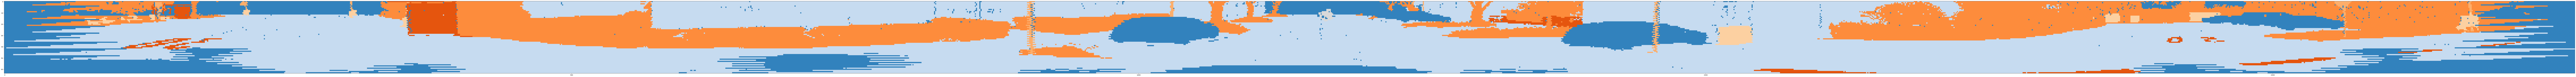

In [256]:
fig = plt.figure(figsize=(10, 10), dpi=2000)
plt.imshow(vis, cmap = "tab20c")